## Parte 3: Programación analítica

In [1]:
# Importo las librería que voy a utilizar
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")
from pandas import *
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
# Importo el diccionario
xls = ExcelFile('Diccionario_prueba_FIX.xlsx')
diccionario = xls.parse(xls.sheet_names[0])
display(diccionario)

,Pregunta,pregunta
0,D1,Genero
1,D2,Edad
2,D3,Nacionalidad
3,D4,Residencia
4,D5,Sostenedor economico
5,D6,Ingreso
6,D7,Frecuencia de compra
7,D8,Horario favorito
8,P01,la tienda ofrece una buena calidad de productos
9,P02,la tienda ofrece precios atractivos


In [3]:
# Importo los datos a un DataFrame
df= pd.read_csv(os.path.join("", "Datos_prueba_Fix.csv"), sep=';',engine='python')

## Exploración de los datos.

In [4]:
df.sample(5)

,D1,D2,D3,D4,D5,D6,D7,D8,P1,P2,...,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28
1532,1,4.0,2.0,7,2,3,3.0,4.0,2.0,2,...,4.0,4,4,4.0,4.0,4.0,4,5.0,5,5
713,1,3.0,1.0,10,1,5,1.0,3.0,3.0,2,...,5.0,4,5,5.0,5.0,5.0,5,5.0,5,5
1246,1,5.0,1.0,7,1,3,3.0,1.0,2.0,2,...,4.0,4,2,3.0,4.0,4.0,4,4.0,4,5
1659,1,2.0,1.0,7,2,1,3.0,2.0,2.0,3,...,5.0,5,4,4.0,3.0,4.0,4,4.0,4,4
1758,1,2.0,1.0,7,2,2,3.0,2.0,3.0,3,...,5.0,4,4,5.0,5.0,5.0,5,4.0,5,5


In [5]:
df.describe(include='all')

,D1,D2,D3,D4,D5,D6,D7,D8,P1,P2,...,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28
count,1998.000000,1996.000000,1993.000000,1998.000000,1998.000000,1998.000000,1994.00000,1991.000000,1995.000000,1998.000000,...,1996.000000,1998.000000,1998.000000,1992.000000,1994.000000,1995.000000,1998.000000,1991.000000,1998.000000,1998.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.138639,3.377756,1.055193,7.508509,1.478979,2.316817,2.57322,2.581617,2.425063,7.522523,...,29.397295,3.832332,23.422923,3.735944,3.571214,3.662155,3.622623,3.780512,3.610110,3.453453
std,0.352825,1.361698,0.228414,2.386046,0.499683,1.334878,1.00969,0.983402,0.541899,223.663017,...,1119.056580,0.874393,894.799130,0.854893,0.974946,0.898648,0.912128,0.896415,0.932707,1.001544
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,7.000000,1.000000,1.000000,1.00000,2.000000,2.000000,2.000000,...,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,3.00000,3.000000,2.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
75%,1.000000,4.000000,1.000000,8.000000,2.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


De la descripción de datos puedo verificar que en algunas variables faltan datos y que hay datos que son mucho mayores a la forma de las respuestas (1 - 5).

In [6]:
# verifico datos nulos
df.isnull().sum() 

D1      0
D2      2
D3      5
D4      0
D5      0
D6      0
D7      4
D8      7
P1      3
P2      0
P3      0
P4     13
P5      1
P6      7
P7      3
P8      5
P9      3
P10     3
P11     0
P12     4
P13     0
P14     0
P15    15
P16     0
P17     4
P18     0
P19     2
P20     0
P21     0
P22     6
P23     4
P24     3
P25     0
P26     7
P27     0
P28     0
dtype: int64

En este caso solo eliminare los datos nulos, ya que por ser preguntas de cuestionario, si imputara los datos por media o por un valor neutral podría alterar algunos resultados

In [7]:
#Elimino los datos nulos
df_clean = df.dropna()
df_clean.shape

(1906, 36)

Reviso los tipos de datos

In [8]:
df_clean.dtypes

D1       int64
D2     float64
D3     float64
D4       int64
D5       int64
D6       int64
D7     float64
D8     float64
P1     float64
P2       int64
P3      object
P4     float64
P5      object
P6      object
P7     float64
P8      object
P9      object
P10     object
P11      int64
P12    float64
P13      int64
P14     object
P15    float64
P16      int64
P17    float64
P18      int64
P19    float64
P20      int64
P21      int64
P22    float64
P23    float64
P24    float64
P25      int64
P26    float64
P27      int64
P28      int64
dtype: object

In [9]:
#Reviso las variables que son tipo objeto
array = ['P3', 'P5', 'P6', 'P8', 'P9', 'P10', 'P14']
for col in array:
    display(df_clean[col].unique())

array(['4', '3', '2', 'a', '1', 'b'], dtype=object)

array(['5', '2', '3', '1', 'a', '2000'], dtype=object)

array(['3', '2', '1', 'b'], dtype=object)

array(['5', '3', '4', '2', '1', 'a', '4000000'], dtype=object)

array(['3', '1', '5', '4', '2', 'a'], dtype=object)

array(['5', '3', '4', '2', 'a', '1', '7', '4000', '5000', '-1'],
      dtype=object)

array(['5', '4', '3', '2', 'a', '7', '1', '400000'], dtype=object)

In [10]:
# defino una función para limpiar los datos, cambio las a por 1 y las b por 2
def limpieza(df,array):
    for col in array:
        df[col] = df[col].apply(lambda x: 1 if x == 'a' else x )
        df[col] = df[col].apply(lambda x: 2 if x == 'b' else int(x) )
    return df

In [11]:
df_clean = limpieza(df_clean,array)

In [12]:
for col in df_clean.columns:
    display(df_clean[col].unique())

array([1, 2, 3], dtype=int64)

array([2., 6., 5., 3., 4., 1., 7.])

array([1., 2.])

array([14,  7,  3,  8,  6,  9, 10, 13, 12,  5,  4, 11,  2, 16,  1, 15],
      dtype=int64)

array([2, 1], dtype=int64)

array([1, 3, 4, 5, 2, 6], dtype=int64)

array([3., 4., 1.])

array([3., 2., 1., 4.])

array([4., 3., 2., 1.])

array([    5,     2,     3,     1, 10000], dtype=int64)

array([4, 3, 2, 1], dtype=int64)

array([2., 3., 1.])

array([   5,    2,    3,    1, 2000], dtype=int64)

array([3, 2, 1], dtype=int64)

array([4., 2., 3., 1.])

array([      5,       3,       4,       2,       1, 4000000], dtype=int64)

array([3, 1, 5, 4, 2], dtype=int64)

array([   5,    3,    4,    2,    1,    7, 4000, 5000,   -1], dtype=int64)

array([  5,   3,   4,   2,   7,   1, 500], dtype=int64)

array([  5.,   3.,   4.,   2.,   7.,   1.,   8., 400.,  -3.,  -2.,  12.])

array([   4,    3,    5,    2,    7,    1, 5000], dtype=int64)

array([     5,      4,      3,      2,      1,      7, 400000],
      dtype=int64)

array([ 4.,  5.,  3.,  2.,  7.,  1., -4., 10.])

array([4, 5, 3, 1, 2, 7], dtype=int64)

array([3., 2., 1., 4., 5.])

array([5, 4, 3, 2, 1], dtype=int64)

array([4., 5., 3., 2., 1.])

array([3, 4, 2, 5, 1], dtype=int64)

array([    2,     3,     4,     5,     1,     9,     8, 40000],
      dtype=int64)

array([4., 2., 5., 3., 1.])

array([4., 3., 2., 5., 1.])

array([3., 5., 2., 4., 1.])

array([3, 4, 2, 5, 1], dtype=int64)

array([4., 3., 2., 5., 1.])

array([3, 5, 2, 4, 1], dtype=int64)

array([3, 2, 4, 5, 1], dtype=int64)

Al revisar los datos veo datos negativos que dejare positivos y datos de miles que dejare en unidades. Luego para el caso de las regresiones eliminare aquellos datos mayores a 5.

In [13]:
for col in df_clean.columns:
    df_clean[col] = df_clean[col].apply(lambda x: x*(-1) if x < 0 else x )

In [14]:
def num_entero(x):
    while x%10==0:
        x = x/10
    return x

In [15]:
# Reduzco los datos que estan en miles
for col in df_clean.columns:
    df_clean[col] = df_clean[col].apply(num_entero)

In [16]:
# Elimino los datos mayores a 5
preguntas = ['P'+str(x+1) for x in range(0,28)] 
for col in preguntas:
    df_clean = df_clean.drop(df_clean[df_clean[col]>5].index)

### Distribución de los datos demográficos

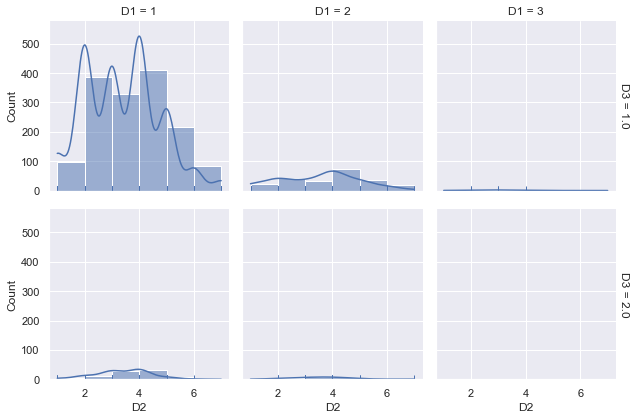

In [17]:
#Grafico en función del genero,sexo y nacionalidad
sns.set_theme(style="darkgrid")
sns.displot(
    df_clean, x="D2", col="D1", row="D3", kde=True,
    binwidth=1, height=3, facet_kws=dict(margin_titles=True),rug=True, label="Edad"
)

Del gráfico podemos inferir que la mayoría de los clientes pertenecen al grupo de sexo 1, al grupo nacionalidad 1 y sus edades se ubican entre los grupos 2 y 6. Por lo que que el sexo y la nacionalidad de las personas no serán influyentes en el resultado de los datos.

### Satisfacción clientes

In [18]:
satisfaccion =  df_clean.groupby("P18").size() #cantidad de clientes por nivel de satisfaccion

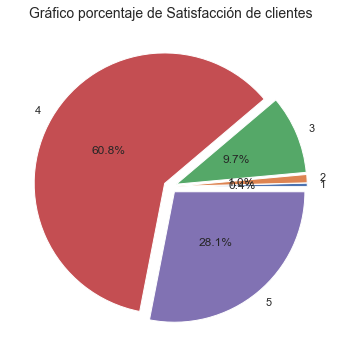

In [19]:
pie, ax = plt.subplots(figsize=[10,6])
labels = satisfaccion.keys()
plt.pie(x=satisfaccion, autopct="%.1f%%", explode=[0.05]*len(satisfaccion), labels=labels, pctdistance=0.5)
plt.title("Gráfico porcentaje de Satisfacción de clientes", fontsize=14);

La mayoría de los clientes se encuentran satifechos o muy satisfechos con los servicios prestados.

### Recomendación Clientes

In [20]:
recomendacion =  df_clean.groupby("P19").size() #cantidad de clientes que recomendarian las tiendas

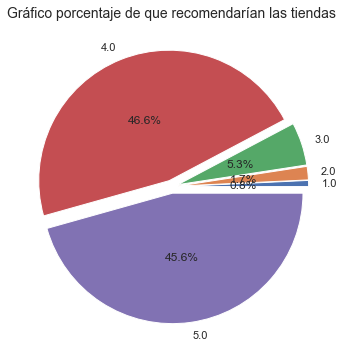

In [21]:
pie, ax = plt.subplots(figsize=[10,6])
labels = recomendacion.keys()
plt.pie(x=recomendacion, autopct="%.1f%%", explode=[0.05]*len(satisfaccion), labels=labels, pctdistance=0.5)
plt.title("Gráfico porcentaje de que recomendarían las tiendas", fontsize=14);

El porcentaje de clientes que recomendarían las tiendas se relaciona positivamente con el nivel de satisfacción que tienen, notándose un aumento en quienes estan muy de acuerdo en recomendar la tienda, respecto del mismo nivel de satisfacción.

### Características mejor evaluadas

In [22]:
#Separaro la variables de observación en 2 grupos
demograficas = ["D1","D2","D3","D4","D5","D6","D7","D8"] 
preguntas = ['P'+str(x+1) for x in range(0,28)] 

In [23]:
df_demograficas = df_clean.drop(preguntas,axis=1) #Incluye variables demograficas
df_preguntas = df_clean.drop(demograficas,axis=1) #Incluye variables preguntas

Gráfica características mejor evaluadas.

In [24]:
mask = df_preguntas==5
mejor_evaluadas = df_preguntas[mask].count()

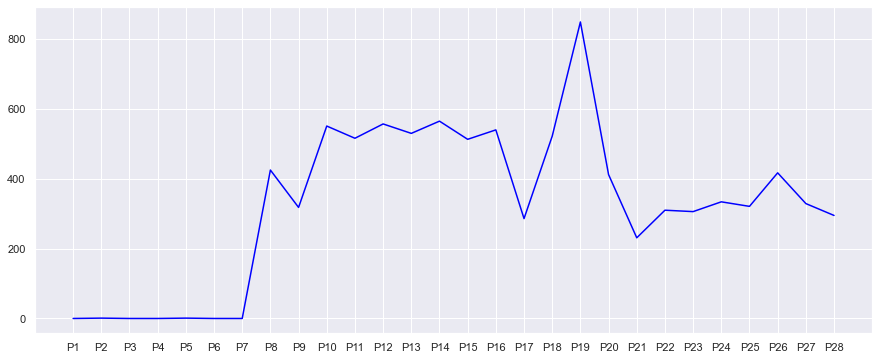

In [25]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(mejor_evaluadas, color='blue')
plt.show()

In [26]:
import operator

In [27]:
# Esta función trae las 5 caracteristicas mejor/peor evaluadas. Excluye Nivel de satisfacción y recomendación
def top_5_evaluadas(df,_eval):
    mask = df==_eval
    mejor_evaluadas = dict(df[mask].count())
    orden = sorted(mejor_evaluadas.items(),key=operator.itemgetter(1), reverse=True)
    top_5 = []
    i = 0
    for caracteristica, count in orden:
        if(caracteristica!='P19' and caracteristica!='P18'):
            top_5.append(caracteristica)
            i += 1
        if i > 4:
            break
    return top_5

In [28]:
top_5_mejor_evaluadas = top_5_evaluadas(df_preguntas,5)
display(top_5_mejor_evaluadas)

['P14', 'P12', 'P10', 'P16', 'P13']

Las caracteristicas mejor evaluadas son:
- P14: Limpieza tiendas es buena.
- P12: Promoción de productos es buena.
- P10: Asistencia en sala de ventas es buena.
- P16: Método de pago son buenos.
- P13: Información de precios es buena.

### Características peor evaluadas

Gráfica características peor evaluadas.

In [29]:
mask = df_preguntas==1
peor_evaluadas = df_preguntas[mask].count()

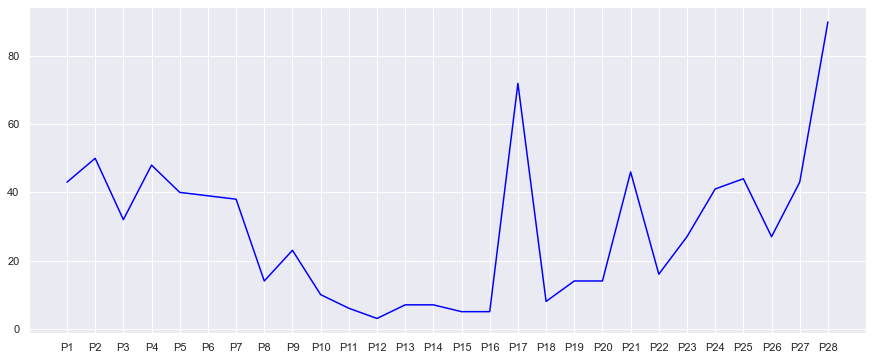

In [30]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(peor_evaluadas, color='blue')
plt.show()

In [31]:
top_5_peor_evaluadas = top_5_evaluadas(df_preguntas,1)
display(top_5_peor_evaluadas)

['P28', 'P17', 'P2', 'P4', 'P21']

Las caracteristicas peor evaluadas son:
- P28: La compensación por problemas es correcta en servicio post venta.
- P17: Disponibilidad de cajas para pago es buena.
- P2: La tienda ofrece precios atractivos.
- P4: La tienda cuenta con suficiente disponibilidad de tallas en sus tiendas.
- P21: Todas nuestras tiendas cuentan con la misma variedad de productos.

## Estudio satisfacción total de los clientes y si estos recomendarían (o no) la tienda visitada. Mediante regresión

In [32]:
#Separaro la variables de las clases
clases = ["P18","P19"] 
X_data = df_clean.drop(clases,axis=1) 
y_data = df_clean[["P18","P19"]]

### Outliers

In [33]:
# Revisamos outlier con Elliptic Envelope
from sklearn.covariance import EllipticEnvelope
from scipy import stats

In [34]:
np.random.seed(42)
outlier_method = EllipticEnvelope(contamination = 0.1)
outlier_method.fit(X_data, y_data)
scores = outlier_method.decision_function(X_data)

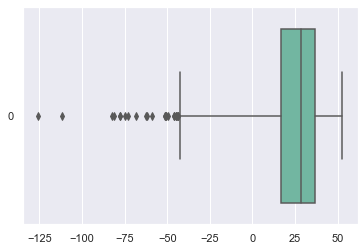

In [35]:
ax = sns.boxplot(data=scores, orient="h", whis=3, palette="Set2")

In [36]:
# Función que calcula outliers
def outlier(scores):
    Q1 = stats.scoreatpercentile(scores, 25)
    Q3 = stats.scoreatpercentile(scores, 75)
    RIC = Q3 - Q1
    li = Q1 - 3*RIC
    ls = Q3 + 3*RIC

    print('limite inferior: ', li)
    print('limite superior: ', ls)
    
    # Estimación de outliers
    pos_i = np.where(scores<li)
    pos_s = np.where(scores>ls)
    
    return pos_i, pos_s

In [37]:
# Calculamos y eliminamos outlier extremos
pos_i, pos_s = outlier(scores)
pos = np.union1d(pos_i[0], pos_s[0])
X_clean = X_data.drop(pos,axis=0)
y_clean = y_data.drop(pos,axis=0)

limite inferior:  -43.577132906058935
limite superior:  96.73357718092731


In [38]:
display(X_clean.shape)
display(y_clean.shape)

(1836, 34)

(1836, 2)

### Selección de características

#### Correlación de los datos

Analizare la correlación de los datos.

In [39]:
#Defino una función para graficar la correlación de los datos
def matriz_correlacion_xy(dataset,title): #Crea una matriz diagonal para las correlaciones     
    corr = dataset.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool)) #Genera una máscara para el triángulo superior.
    f,ax = plt.subplots(figsize=(30,20))
    cmap = sns.diverging_palette(240, 10, n=20)
    sns.heatmap(corr, mask=mask, cmap=cmap,  annot=True, annot_kws={'size':14}, ax=ax)
    ax.set_title(title, fontsize=20)
    plt.show()

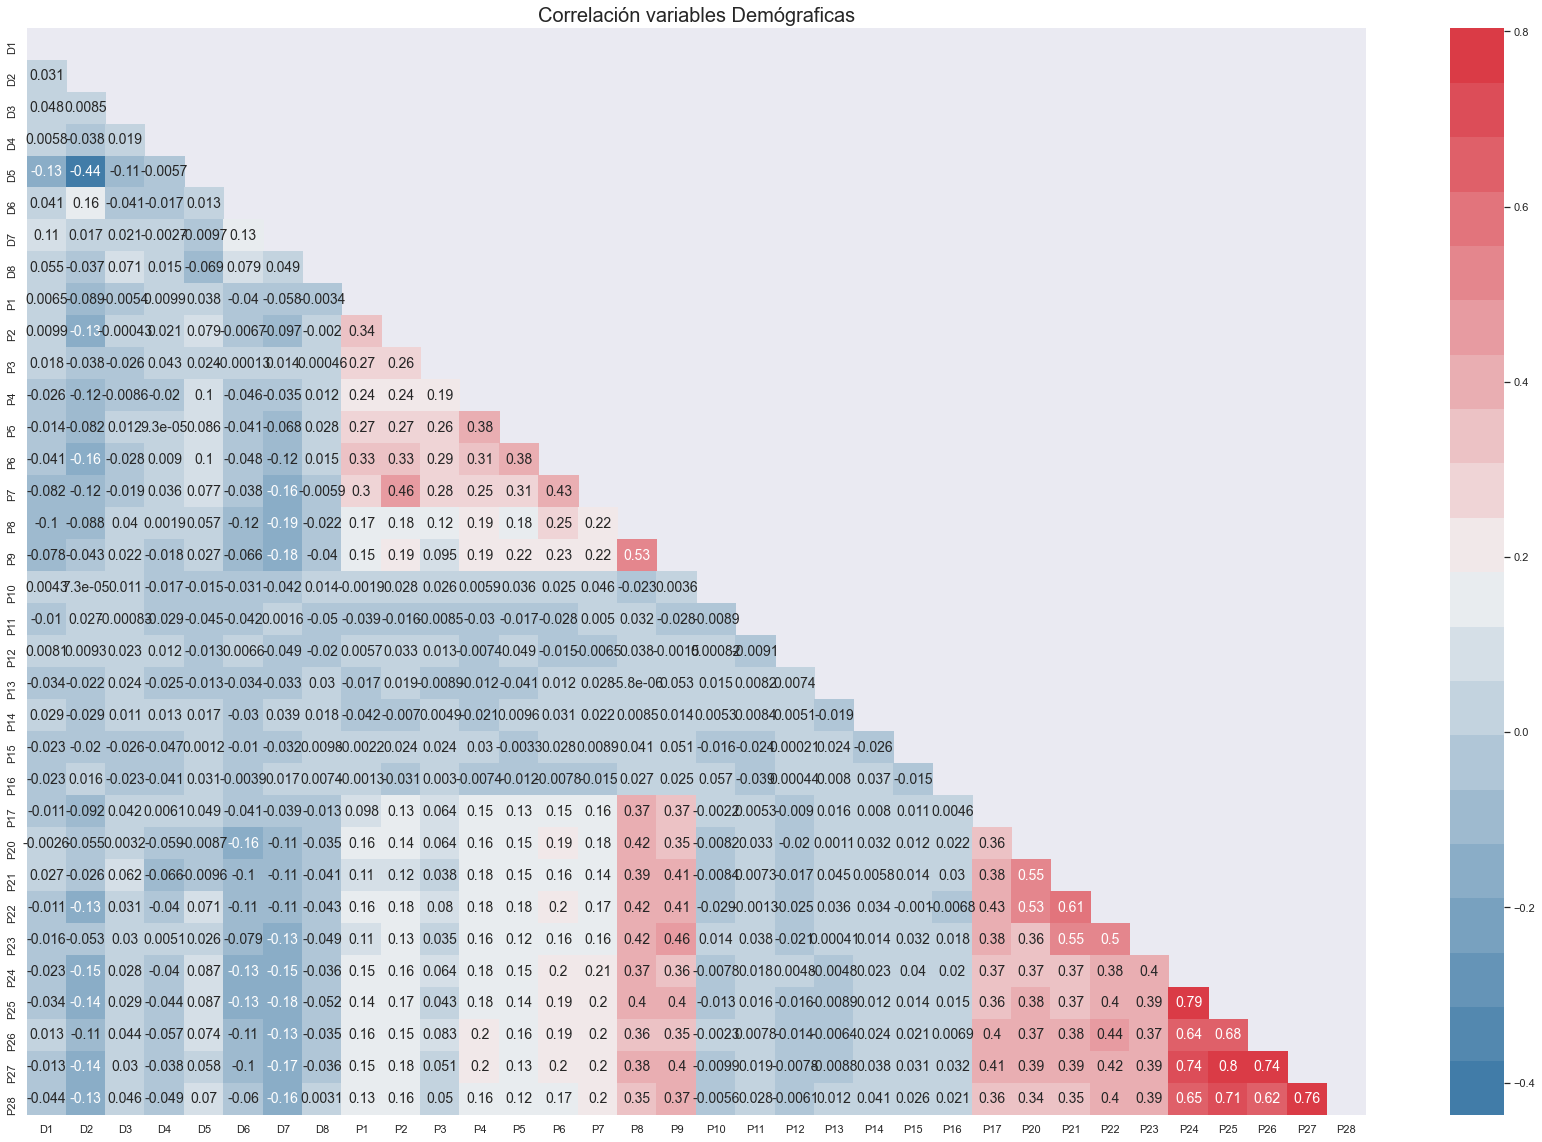

In [40]:
matriz_correlacion_xy(X_clean,"Correlación variables Demógraficas")

In [41]:
corr = X_clean.corr() # Matriz de correlación
th_corr = 0.75  # Umbral de correlación
idx = abs(corr) > th_corr
# Obtengo matriz trangular superior
mat_tri_sup = np.triu(idx,1)
row, col = np.where(mat_tri_sup == True)
# Se obtiene los índices de las columnas correlacionadas
id_corr = np.unique(col)

# Columnas correlacionas
col_corr = list(X_clean.columns[id_corr])
display(col_corr)

['P25', 'P27', 'P28']

Las variables 'P25', 'P27', 'P28' se encuentran altamente correlacionadas y tienen relación con el servicio postventa, por lo que dejare solo P25. Con respecto a las variables demográficas no utilizare, ya que como se vio en el gráfico demográfico, la mayoría de los clientes pertencen al mismo grupo, sino que luego analizare el comportamiento según la edad de aquellas variables que más influyen.

In [42]:
# Eliminamos las columnas correladas
X_clean = X_clean.drop(columns=col_corr[1:])

In [43]:
X_clean = X_clean.drop(columns=demograficas)
X_clean.shape

(1836, 24)

Aplicare la tecnica F-test para seleccionar los atributos y reducir a la mitad las características, aprox. 12. Lo haré primero para la clase P18 y luego para la clase P19.

In [44]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=12)

### Regresión satisfacción de los clientes

In [45]:
selector.fit(X_clean, y_clean['P18'])
X_final = selector.transform(X_clean)
y_final = y_clean['P18']
display(X_final.shape)
display(y_final.shape)

(1836, 12)

(1836,)

#### Partición y Preprocesado

In [46]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, shuffle=True, random_state=42)

In [48]:
standardizer = preprocessing.StandardScaler()
f = standardizer.fit(X_train)
X_train = f.transform(X_train)

#### Modelado

In [49]:
from math import sqrt
from sklearn import  linear_model, metrics
from sklearn.model_selection import cross_validate, KFold, cross_val_predict
from sklearn.metrics import make_scorer, mean_squared_error

In [50]:
alg = linear_model.LinearRegression()

In [51]:
# Métricas de evaluación.
metricas = {
  'MAE':  metrics.mean_absolute_error,
  'RMSE': lambda y, y_pred:
          sqrt(metrics.mean_squared_error(y, y_pred))
}

In [52]:
# Entrenamiento.
model = alg.fit(X_train, y_train)

In [53]:
#Columnas seleccionadas
print(X_clean.columns[selector.get_support(indices=True)].tolist())
# Obtención de los coeficientes del modelo.
w = model.coef_
print(w)

['P6', 'P7', 'P8', 'P9', 'P17', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26']
[ 0.02943749  0.03018076  0.15851603  0.13273205  0.1133369   0.05823486
 -0.06160214  0.05935408  0.04448417  0.01929179  0.02139475  0.07359352]


In [54]:
# Validación y obtención de las predicciones del modelo.
y_pred = cross_val_predict(model, X_train, y_train, cv = KFold(n_splits=10, random_state=42, shuffle=True))

In [55]:
# Cálculo de las métricas de evaluación.
MAE = metricas['MAE'](y_train, y_pred)
RMSE = metricas['RMSE'](y_train, y_pred)

print('MAE:  %.4f' % MAE)
print('RMSE: %.4f' % RMSE)

MAE:  0.3535
RMSE: 0.4816


Como resultado podemos observar que las características que más influyen son:
- P8: Ubicación productos es buena.
- P9: Disponibilidad de productos es buena.
- P17: Disponibilidad de cajas para pago es buena.
    

### Regresión recomendación de la tienda visitada

In [56]:
selector.fit(X_clean, y_clean['P19'])
X_final = selector.transform(X_clean)
y_final = y_clean['P19']
display(X_final.shape)
display(y_final.shape)

(1836, 12)

(1836,)

#### Partición y Preprocesado

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, shuffle=True, random_state=42)

In [58]:
standardizer = preprocessing.StandardScaler()
f = standardizer.fit(X_train)
X_train = f.transform(X_train)

#### Modelado

In [59]:
# Entrenamiento.
model = alg.fit(X_train, y_train)

In [60]:
#Columnas seleccionadas
print(X_clean.columns[selector.get_support(indices=True)].tolist())
# Obtención de los coeficientes del modelo.
w = model.coef_
print(w)

['P6', 'P7', 'P8', 'P9', 'P17', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26']
[ 0.05620846  0.05343521  0.1180698   0.11317852  0.07948837  0.05169672
 -0.0654344   0.05366807  0.06473734  0.05635667  0.01654857  0.05861358]


In [61]:
# Validación y obtención de las predicciones del modelo.
y_pred = cross_val_predict(model, X_train, y_train, cv = KFold(n_splits=10, random_state=42, shuffle=True))

In [62]:
# Cálculo de las métricas de evaluación.
MAE = metricas['MAE'](y_train, y_pred)
RMSE = metricas['RMSE'](y_train, y_pred)

print('MAE:  %.4f' % MAE)
print('RMSE: %.4f' % RMSE)

MAE:  0.4267
RMSE: 0.5799


Como resultado podemos observar que las características que más influyen son:
- P8: Ubicación productos es buena.
- P9: Disponibilidad de productos es buena.
    

In [63]:
df_edad =  df_clean.groupby("D2").mean()

Text(0.5, 1.0, 'Disponibilidad de cajas')

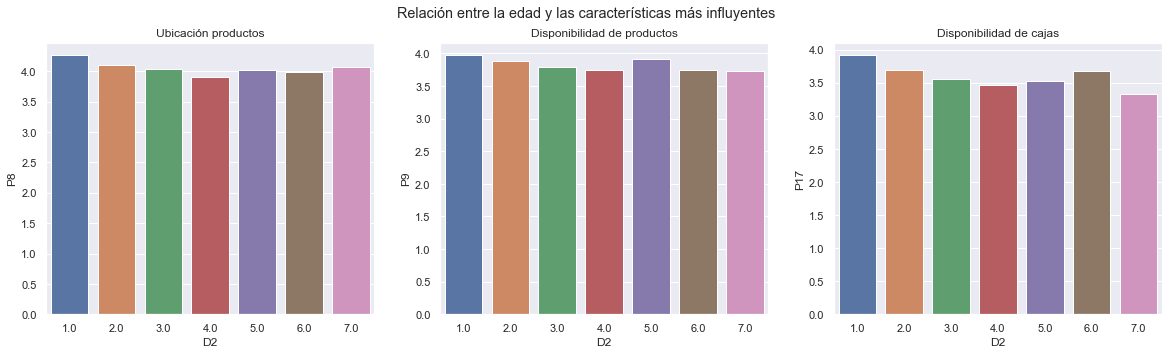

In [64]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(20,5))
fig.suptitle('Relación entre la edad y las características más influyentes')
sns.barplot(ax=axes[0], x=df_edad.index, y=df_edad['P8'])
axes[0].set_title('Ubicación productos')
sns.barplot(ax=axes[1], x=df_edad.index, y=df_edad['P9'])
axes[1].set_title('Disponibilidad de productos')
sns.barplot(ax=axes[2], x=df_edad.index, y=df_edad['P17'])
axes[2].set_title('Disponibilidad de cajas')

Se puede inferir de la gráfica que para los casos de la disponibilidad de productos y disponibilidad de cajas hay una marcada diferencia entre los grupos etarios. Lo que es coherente si se piensa que para las personas mayores estar mucho tiempo esperando para pagar puede ser algo complejo. Con respecto a la disponilibidad de productos también es coherente ya que para ciertas edades las diferencias entre tallas o modelos es bantante, por lo que la poca disponibilidad de estos también sería algo que afectaría más a distintos grupos de edades.

## Conclusiones y recomendaciones

Como se ha podido observar en el análisis los factores que influyen en la satisfacción de los clientes y posterior recomendación estan relacionados con:
- Los productos su calidad y disponibilidad
- La disponibilidad de cajas
- Servicio Post Venta

Cabe destacar que de estos factores los que tendrían una mayor incidencia serían la disponibilidad y ubicación de los productos, junto con la disponibilidad de cajas.

Por lo anterior recomendamos mejorar la disponibilidad de productos mejorando el nivel de stock y variedad; y su ubicación tanto en el orden como en el fácil acceso a ellos. También recomendamos mejorar la disponibilidad de las cajas, habilitando por ejemplo cajeros automaticos de pago, para las personas que necesiten pagar solo su cuenta.